### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

In [9]:
tf.enable_eager_execution

<function tensorflow.python.framework.ops.enable_eager_execution>

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
trainX.shape

(60000, 28, 28)

In [7]:
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
from keras.utils import to_categorical

In [0]:
train_labels=to_categorical(trainY)
test_labels=to_categorical(testY)

In [31]:
print(train_labels.shape)
print('First 5 examples now are: ', train_labels[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt

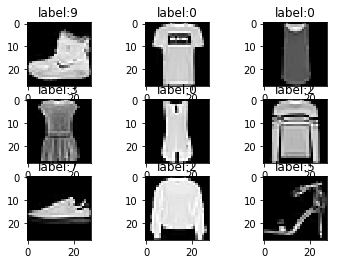

In [55]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  plt.title('label:{}'.format(trainY[i]))
  
plt.show()
  
  

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [58]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

W0929 11:28:10.116364 140146649196416 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model using model.fit()

In [60]:
model.fit(trainX,train_labels,          
          validation_data=(testX,test_labels),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 42us/sample - loss: 2074.8410 - acc: 0.7370 - val_loss: 1803.0551 - val_acc: 0.7827
Epoch 2/15
60000/60000 [==============================] - 2s 38us/sample - loss: 1568.4433 - acc: 0.7801 - val_loss: 2428.8583 - val_acc: 0.7506
Epoch 3/15
60000/60000 [==============================] - 2s 37us/sample - loss: 1531.9315 - acc: 0.7867 - val_loss: 1146.1485 - val_acc: 0.8055
Epoch 4/15
60000/60000 [==============================] - 2s 38us/sample - loss: 1524.6488 - acc: 0.7881 - val_loss: 1052.5071 - val_acc: 0.8146
Epoch 5/15
60000/60000 [==============================] - 2s 37us/sample - loss: 1518.5785 - acc: 0.7920 - val_loss: 1375.3006 - val_acc: 0.7896
Epoch 6/15
60000/60000 [==============================] - 2s 37us/sample - loss: 1425.5136 - acc: 0.7976 - val_loss: 1018.4149 - val_acc: 0.8190
Epoch 7/15
60000/60000 [==============================] - 2s 37us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [62]:
model.fit(trainX,train_labels,          
          validation_data=(testX,test_labels),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6071 - acc: 0.7896 - val_loss: 0.5117 - val_acc: 0.8254
Epoch 2/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4900 - acc: 0.8304 - val_loss: 0.4956 - val_acc: 0.8290
Epoch 3/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4688 - acc: 0.8393 - val_loss: 0.4817 - val_acc: 0.8355
Epoch 4/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4564 - acc: 0.8421 - val_loss: 0.4733 - val_acc: 0.8386
Epoch 5/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4483 - acc: 0.8450 - val_loss: 0.4751 - val_acc: 0.8366
Epoch 6/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4424 - acc: 0.8467 - val_loss: 0.4686 - val_acc: 0.8370
Epoch 7/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4383 - acc: 0.8469 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from keras import optimizers
sgd=sgd = optimizers.SGD(lr=0.001)

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [67]:
model.fit(trainX,train_labels,          
          validation_data=(testX,test_labels),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4203 - acc: 0.8530 - val_loss: 0.4683 - val_acc: 0.8399
Epoch 2/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4219 - acc: 0.8526 - val_loss: 0.4671 - val_acc: 0.8409
Epoch 3/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4187 - acc: 0.8538 - val_loss: 0.4659 - val_acc: 0.8399
Epoch 4/15
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4183 - acc: 0.8529 - val_loss: 0.4596 - val_acc: 0.8416
Epoch 5/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4179 - acc: 0.8537 - val_loss: 0.4788 - val_acc: 0.8400
Epoch 6/15
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4163 - acc: 0.8550 - val_loss: 0.4647 - val_acc: 0.8397
Epoch 7/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4150 - acc: 0.8534 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
sgd= optimizers.SGD(lr=0.03)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [72]:
model.fit(trainX,train_labels,          
          validation_data=(testX,test_labels),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 86us/sample - loss: 1.5520 - acc: 0.5908 - val_loss: 1.0498 - val_acc: 0.7191
Epoch 2/15
60000/60000 [==============================] - 5s 87us/sample - loss: 0.8721 - acc: 0.7366 - val_loss: 0.7314 - val_acc: 0.7561
Epoch 3/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.6844 - acc: 0.7650 - val_loss: 0.6261 - val_acc: 0.7772
Epoch 4/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.6038 - acc: 0.7878 - val_loss: 0.5686 - val_acc: 0.7922
Epoch 5/15
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5560 - acc: 0.8038 - val_loss: 0.5298 - val_acc: 0.8070
Epoch 6/15
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5219 - acc: 0.8156 - val_loss: 0.5041 - val_acc: 0.8173
Epoch 7/15
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4973 - acc: 0.8231 - val_loss: 0.

In [0]:
pred = model.predict_classes(testX)

In [0]:
m = tf.keras.metrics.Accuracy()

In [82]:
test_loss,test_acc = model.evaluate(testX,test_labels)


10000/10000 [==============================] - 0s 37us/sample - loss: 0.4230 - acc: 0.8456


In [83]:
test_acc

0.8456